In [2]:
#Importing libraries
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
from google.colab import files
uploaded = files.upload()    #To upload files from local drive to colabs

Saving QCOM.csv to QCOM.csv


In [4]:
#Reading data
import io
qcom = pd.read_csv(io.BytesIO(uploaded['QCOM.csv']))  
print(qcom)

            Date Close/Last    Volume      Open       High      Low
0     06/09/2021    $132.89   6717243  $135.105    $135.35  $132.79
1     06/08/2021     $134.2   9657889   $134.06  $135.3895     $133
2     06/07/2021    $133.32   5563253    $133.7    $133.77  $132.64
3     06/04/2021    $134.34   7416675  $132.525    $135.05   $132.2
4     06/03/2021    $131.78   6643997   $132.65    $133.39  $131.42
...          ...        ...       ...       ...        ...      ...
2511  06/16/2011     $52.99  19440800    $54.12     $54.21   $52.42
2512  06/15/2011      $54.1  16748740    $55.23     $55.56    $53.8
2513  06/14/2011     $55.58  11995730    $54.87     $55.87   $54.75
2514  06/13/2011      $54.4  10670650    $54.79     $54.89   $54.24
2515  06/10/2011      $54.6  14524760     $55.7     $55.74  $54.355

[2516 rows x 6 columns]


In [5]:
qcom['Date'] = pd.to_datetime(qcom['Date'])
#convert object type to float
qcom=qcom.rename(columns={'Close/Last':'Close'})
qcom['Close']=qcom['Close'].replace('[\$]','',regex=True).astype(float)
qcom[qcom.columns[3:]]=qcom[qcom.columns[3:]].replace('[\$]','',regex=True).astype(float)
qcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [6]:
print(f'Dataframe contains stock prices from {qcom.Date.min()} to {qcom.Date.max()}')
print(f'Total no.of days = {(qcom.Date.max()- qcom.Date.min()).days} days')

Dataframe contains stock prices from 2011-06-10 00:00:00 to 2021-06-09 00:00:00
Total no.of days = 3652 days


In [7]:
qcom.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,70.716720,1.172424e+07,70.719193,71.476072,69.950835
std,22.389306,7.399784e+06,22.442521,22.739970,22.071313
min,42.960000,2.120165e+06,42.510000,43.290000,42.240000
25%,56.737500,7.739491e+06,56.610000,57.257500,56.139825
50%,65.195000,1.008450e+07,65.145000,65.805000,64.545000
75%,74.830000,1.338639e+07,74.830000,75.555000,74.117500
max,164.780000,1.559539e+08,167.577000,167.940000,164.440000


In [8]:
qcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


<function matplotlib.pyplot.show>

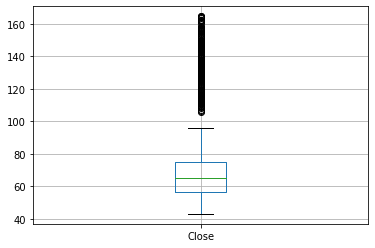

In [10]:
#Outlier detection
qcom.boxplot(column='Close')
plt.show

<function matplotlib.pyplot.show>

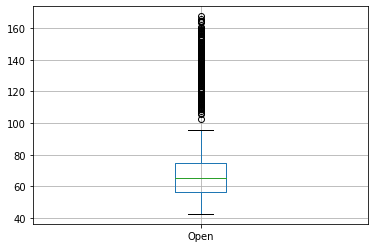

In [11]:
qcom.boxplot(column='Open')
plt.show

<function matplotlib.pyplot.show>

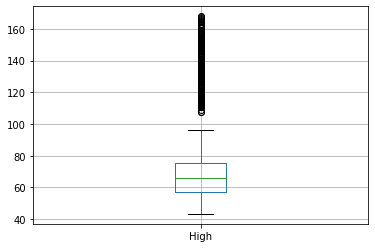

In [12]:
qcom.boxplot(column='High')
plt.show

<function matplotlib.pyplot.show>

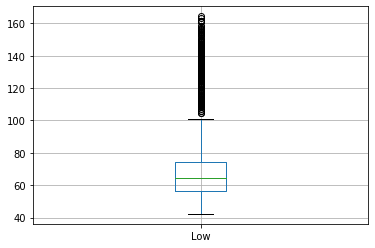

In [13]:
qcom.boxplot(column='Low')
plt.show

<function matplotlib.pyplot.show>

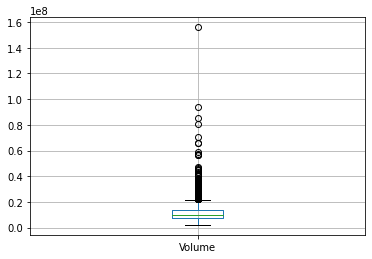

In [14]:
qcom.boxplot(column='Volume')
plt.show

In [15]:
def remove_outliners(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  l_range= Q1-(1.5*IQR)
  u_range= Q3+(1.5*IQR)
  return l_range,u_range

In [16]:
x,y=remove_outliners(qcom['Volume'])
qcom['Volume']=np.where(qcom['Volume']>y, y, qcom['Volume'])
qcom['Volume']=np.where(qcom['Volume']<x, x, qcom['Volume'])

In [17]:
x,y=remove_outliners(qcom['High'])
qcom['High']=np.where(qcom['High']>y, y, qcom['High'])
qcom['High']=np.where(qcom['High']<x, x, qcom['High'])

In [18]:
x,y=remove_outliners(qcom['Low'])
qcom['Low']=np.where(qcom['Low']>y, y, qcom['Low'])
qcom['Low']=np.where(qcom['Low']<x, x, qcom['Low'])

In [19]:
x,y=remove_outliners(qcom['Open'])
qcom['Open']=np.where(qcom['Open']>y, y, qcom['Open'])
qcom['Open']=np.where(qcom['Open']<x, x, qcom['Open'])

In [20]:
x,y=remove_outliners(qcom['Close'])
qcom['Close']=np.where(qcom['Close']>y, y, qcom['Close'])
qcom['Close']=np.where(qcom['Close']<x, x, qcom['Close'])

Text(0.5, 1.0, 'Open vs Close')

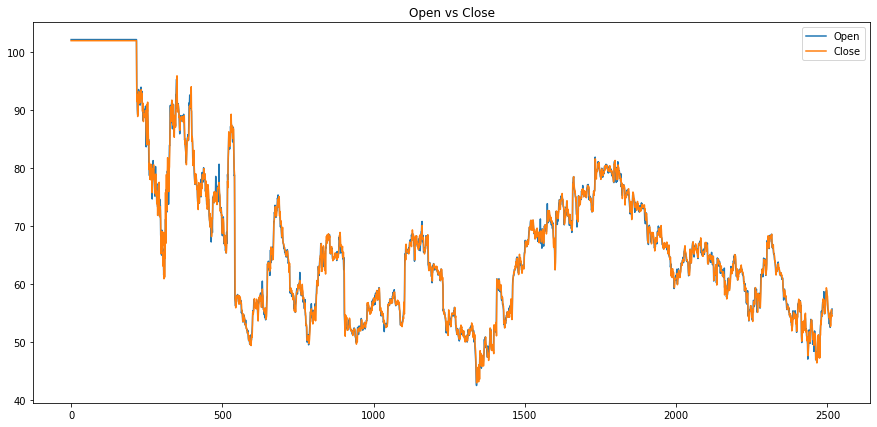

In [21]:
qcom['Open'].plot(label='Open',figsize=(15,7))
qcom['Close'].plot(label='Close')
plt.legend()
plt.title("Open vs Close")

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Headlines_2015.csv to Headlines_2015.csv
Saving Headlines_2016.csv to Headlines_2016.csv
Saving Headlines_2017.csv to Headlines_2017.csv
Saving Headlines_2018.csv to Headlines_2018.csv
Saving Headlines_2019.csv to Headlines_2019.csv
Saving Headlines_2020.csv to Headlines_2020.csv
Saving Headlines_2021.csv to Headlines_2021.csv


In [26]:
df1 = pd.read_csv(io.BytesIO(uploaded['Headlines_2015.csv']),encoding='ISO-8859-1')
df2 = pd.read_csv(io.BytesIO(uploaded['Headlines_2016.csv']),encoding='ISO-8859-1')
df3 = pd.read_csv(io.BytesIO(uploaded['Headlines_2017.csv']),encoding='ISO-8859-1')
df4 = pd.read_csv(io.BytesIO(uploaded['Headlines_2018.csv']),encoding='ISO-8859-1')
df5 = pd.read_csv(io.BytesIO(uploaded['Headlines_2019.csv']),encoding='ISO-8859-1')
df6 = pd.read_csv(io.BytesIO(uploaded['Headlines_2020.csv']),encoding='ISO-8859-1')
df7 = pd.read_csv(io.BytesIO(uploaded['Headlines_2021.csv']),encoding='ISO-8859-1')

In [27]:
#Concatenating all news data into one
news=pd.concat([df1,df2,df3,df4,df5,df6,df7])
news

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...


In [28]:
news['Date']=pd.to_datetime(news['Date'],format='%Y/%m/%d')
news["Headlines"]=news["Headlines"].astype(str)
news.dtypes

Date         datetime64[ns]
Headlines            object
dtype: object

In [30]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#Datacleaning and pre-processing
import re
from nltk.corpus import stopwords

In [33]:
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(lambda x: x.lower()) #convert into lowercase

In [34]:
import string
def char_rmvl(text):                 #Removing all char except a-z and A-Z and replace them with ' '
    new=[char for char in text if char not in string.punctuation]
    new_str=''.join(new)
    new.clear()
    return new_str
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(char_rmvl)


In [35]:
#Removing stopwords
stop = stopwords.words('english')
news['Headlines'] = news['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news

,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman sources moats concern applequo...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deals apple watch...
170,2021-06-20,iphone 13 rumors apples fall event gets closer...
171,2021-06-21,apple shortening new free tv plus trials year ...
172,2021-06-22,google likely soon face antitrust claims play ...


In [36]:
#Apply lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  #used to perform lemmatization
def lemmat(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
news['Headlines'] = news['Headlines'].apply(lemmat)
news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman source moat concern applequots...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deal apple watch ...
170,2021-06-20,iphone 13 rumor apple fall event get closer se...
171,2021-06-21,apple shortening new free tv plus trial year t...
172,2021-06-22,google likely soon face antitrust claim play s...


In [37]:
qcom=pd.merge(qcom,news,on=['Date'],how='outer')
qcom

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,101.96875,6717243.0,102.16,103.00125,101.084012,athenahealth set support io 15 feature allows ...
1,2021-06-08,101.96875,9657889.0,102.16,103.00125,101.084012,apple chinese manufacturer talk u car battery ...
2,2021-06-07,101.96875,5563253.0,102.16,103.00125,101.084012,applequots new quotprivate relayquot feature a...
3,2021-06-04,101.96875,7416675.0,102.16,103.00125,101.084012,global equity nearly grasp alltime record doll...
4,2021-06-03,101.96875,6643997.0,102.16,103.00125,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,NaN,NaN,NaN,NaN,NaN,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,NaN,NaN,NaN,NaN,NaN,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,NaN,NaN,NaN,NaN,NaN,apple shortening new free tv plus trial year t...
3282,2021-06-22,NaN,NaN,NaN,NaN,NaN,google likely soon face antitrust claim play s...


In [38]:
qcom.isnull().sum()

Date           0
Close        748
Volume       748
Open         748
High         748
Low          748
Headlines    919
dtype: int64

In [40]:
qcom['Close'].fillna(qcom['Close'].mean(), inplace=True)
qcom['Volume'].fillna(qcom['Volume'].mean(), inplace=True)
qcom['Open'].fillna(qcom['Open'].mean(), inplace=True)
qcom['High'].fillna(qcom['High'].mean(), inplace=True)
qcom['Low'].fillna(qcom['Low'].mean(), inplace=True)

In [41]:
qcom=qcom.fillna('')
qcom.sort_values(ascending = True ,by = 'Date')
qcom

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,101.968750,6.717243e+06,102.160000,103.001250,101.084012,athenahealth set support io 15 feature allows ...
1,2021-06-08,101.968750,9.657889e+06,102.160000,103.001250,101.084012,apple chinese manufacturer talk u car battery ...
2,2021-06-07,101.968750,5.563253e+06,102.160000,103.001250,101.084012,applequots new quotprivate relayquot feature a...
3,2021-06-04,101.968750,7.416675e+06,102.160000,103.001250,101.084012,global equity nearly grasp alltime record doll...
4,2021-06-03,101.968750,6.643997e+06,102.160000,103.001250,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,68.069995,1.110193e+07,68.075366,68.761308,67.378060,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,68.069995,1.110193e+07,68.075366,68.761308,67.378060,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,68.069995,1.110193e+07,68.075366,68.761308,67.378060,apple shortening new free tv plus trial year t...
3282,2021-06-22,68.069995,1.110193e+07,68.075366,68.761308,67.378060,google likely soon face antitrust claim play s...


In [42]:
qcom.duplicated().sum()

23

In [44]:
qcom.drop_duplicates(inplace=True,ignore_index=True)
qcom.duplicated().sum()

0

In [45]:
qcom.set_index("Date", inplace = True)
qcom.head()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,101.96875,6717243.0,102.16,103.00125,101.084012,athenahealth set support io 15 feature allows ...
2021-06-08,101.96875,9657889.0,102.16,103.00125,101.084012,apple chinese manufacturer talk u car battery ...
2021-06-07,101.96875,5563253.0,102.16,103.00125,101.084012,applequots new quotprivate relayquot feature a...
2021-06-04,101.96875,7416675.0,102.16,103.00125,101.084012,global equity nearly grasp alltime record doll...
2021-06-03,101.96875,6643997.0,102.16,103.00125,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...


In [46]:
qcom.sort_values(ascending = True ,by = 'Date')
qcom

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,101.968750,6.717243e+06,102.160000,103.001250,101.084012,athenahealth set support io 15 feature allows ...
2021-06-08,101.968750,9.657889e+06,102.160000,103.001250,101.084012,apple chinese manufacturer talk u car battery ...
2021-06-07,101.968750,5.563253e+06,102.160000,103.001250,101.084012,applequots new quotprivate relayquot feature a...
2021-06-04,101.968750,7.416675e+06,102.160000,103.001250,101.084012,global equity nearly grasp alltime record doll...
2021-06-03,101.968750,6.643997e+06,102.160000,103.001250,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,68.069995,1.110193e+07,68.075366,68.761308,67.378060,best preprime day smartwatch deal apple watch ...
2021-06-20,68.069995,1.110193e+07,68.075366,68.761308,67.378060,iphone 13 rumor apple fall event get closer se...
2021-06-21,68.069995,1.110193e+07,68.075366,68.761308,67.378060,apple shortening new free tv plus trial year t...


In [47]:
qcom.duplicated().sum()

2

In [48]:
qcom.drop_duplicates()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,101.968750,6.717243e+06,102.160000,103.001250,101.084012,athenahealth set support io 15 feature allows ...
2021-06-08,101.968750,9.657889e+06,102.160000,103.001250,101.084012,apple chinese manufacturer talk u car battery ...
2021-06-07,101.968750,5.563253e+06,102.160000,103.001250,101.084012,applequots new quotprivate relayquot feature a...
2021-06-04,101.968750,7.416675e+06,102.160000,103.001250,101.084012,global equity nearly grasp alltime record doll...
2021-06-03,101.968750,6.643997e+06,102.160000,103.001250,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,68.069995,1.110193e+07,68.075366,68.761308,67.378060,best preprime day smartwatch deal apple watch ...
2021-06-20,68.069995,1.110193e+07,68.075366,68.761308,67.378060,iphone 13 rumor apple fall event get closer se...
2021-06-21,68.069995,1.110193e+07,68.075366,68.761308,67.378060,apple shortening new free tv plus trial year t...


In [49]:
qcom[:].isnull().sum()

Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [50]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [51]:
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
qcom['compound'] = qcom['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
qcom['negative'] = qcom['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
qcom['neutral'] = qcom['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
qcom['positive'] = qcom['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

In [52]:
from scipy import stats

In [53]:
# Adding Subjectivity and Polarity columns
from sklearn.metrics import accuracy_score,classification_report
from textblob import TextBlob
def getsubj(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [54]:
qcom['Subjectivity']=qcom['Headlines'].apply(getsubj)
qcom['Polarity']=qcom['Headlines'].apply(getpolarity)
qcom

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,
2021-06-09,101.968750,6.717243e+06,102.160000,103.001250,101.084012,athenahealth set support io 15 feature allows ...,0.9905,0.051,0.850,0.099,0.372039,0.111292
2021-06-08,101.968750,9.657889e+06,102.160000,103.001250,101.084012,apple chinese manufacturer talk u car battery ...,0.9972,0.037,0.830,0.133,0.441778,0.148372
2021-06-07,101.968750,5.563253e+06,102.160000,103.001250,101.084012,applequots new quotprivate relayquot feature a...,0.9972,0.023,0.869,0.109,0.472968,0.174002
2021-06-04,101.968750,7.416675e+06,102.160000,103.001250,101.084012,global equity nearly grasp alltime record doll...,0.9953,0.038,0.849,0.113,0.406474,0.112212
2021-06-03,101.968750,6.643997e+06,102.160000,103.001250,101.084012,buy rh stock dip q1 earnings growth wwdc 2021 ...,0.9926,0.059,0.822,0.119,0.323765,0.088232
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19,68.069995,1.110193e+07,68.075366,68.761308,67.378060,best preprime day smartwatch deal apple watch ...,0.9910,0.029,0.796,0.175,0.391640,0.148395
2021-06-20,68.069995,1.110193e+07,68.075366,68.761308,67.378060,iphone 13 rumor apple fall event get closer se...,0.9947,0.039,0.777,0.184,0.372926,0.308141
2021-06-21,68.069995,1.110193e+07,68.075366,68.761308,67.378060,apple shortening new free tv plus trial year t...,0.9988,0.040,0.777,0.183,0.362845,0.272403


In [55]:

# Extracting data req for model building
qcom = qcom[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume','Subjectivity','Polarity']]
qcom.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
Date,,,,,,,,,,,
2021-06-09,101.96875,0.9905,0.051,0.850,0.099,102.16,103.00125,101.084012,6717243.0,0.372039,0.111292
2021-06-08,101.96875,0.9972,0.037,0.830,0.133,102.16,103.00125,101.084012,9657889.0,0.441778,0.148372
2021-06-07,101.96875,0.9972,0.023,0.869,0.109,102.16,103.00125,101.084012,5563253.0,0.472968,0.174002
2021-06-04,101.96875,0.9953,0.038,0.849,0.113,102.16,103.00125,101.084012,7416675.0,0.406474,0.112212
2021-06-03,101.96875,0.9926,0.059,0.822,0.119,102.16,103.00125,101.084012,6643997.0,0.323765,0.088232


In [56]:
qcom.dtypes

Close           float64
compound        float64
negative        float64
neutral         float64
positive        float64
Open            float64
High            float64
Low             float64
Volume          float64
Subjectivity    float64
Polarity        float64
dtype: object

In [57]:
X = qcom.loc[:,'compound':'Polarity']
y = qcom['Close']

In [58]:
from sklearn.model_selection import train_test_split #for building regression model
from sklearn.preprocessing import MinMaxScaler  #For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse   #For model evaluation
from sklearn.metrics import r2_score

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [60]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(l.intercept_)

0.1328964436590354


In [62]:
yhat=l.predict(X_test)

In [63]:
# Actual vs Predicted prizes
dframe = pd.DataFrame(y_test,yhat)
dfr=pd.DataFrame({"Actual_price":y_test,"Predicted_price":yhat})
dfr

,Actual_price,Predicted_price
Date,,
2016-03-25,68.069995,68.067441
2015-06-16,66.460000,66.188773
2016-10-16,68.069995,68.051020
2017-11-06,62.520000,63.180732
2017-01-21,68.069995,68.042430
...,...,...
2017-05-12,55.320000,55.127093
2021-04-13,101.968750,101.966486
2017-01-20,62.880000,63.516027


In [64]:
l.score(X_test,y_test)*100

99.91118690805199

In [65]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,l.predict(X_train))}\t{r2_score(y_test,l.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9992725604871545	0.9991118690805199



In [67]:
from sklearn import metrics

In [68]:

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, yhat)) 

Mean Absolute Error: 0.21805679299911981


In [70]:
#use k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99911187, 0.99928921, 0.99940065, 0.99911687, 0.99921128])

In [72]:
import datetime
last_day = qcom.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-24 00:00:00


In [73]:
X.columns

Index(['compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low',
       'Volume', 'Subjectivity', 'Polarity'],
      dtype='object')

In [74]:
# Functions to predict Close

def Convert(Headlines):
    Headline = list(Headlines.split("-"))
    return Headline

def filter(Headline):
    Head = [ x.lower() for x in Headline]
    Head = [char_rmvl(x) for x in Head]
    Head = [' '.join([word for word in s.split() if word not in (stop)]) for s in Head]
    Head = [lemmat(s) for s in Head]
    return Head

def sent_anls(Head):
    compound = [sid.polarity_scores(x)['compound'] for x in Head]
    negative = [sid.polarity_scores(x)['neg'] for x in Head]
    neutral = [sid.polarity_scores(x)['neu'] for x in Head]
    positive = [sid.polarity_scores(x)['pos'] for x in Head]
    subjectivity = [getsubj(x) for x in Head]
    polarity = [getpolarity(x) for x in Head]

    return compound,negative,neutral,positive,subjectivity,polarity




def predict_price(Open,High,Low,Volume,Headlines):
    head = filter(Headlines)
    cmpd,negt,neut,post,subj,pol = sent_anls(head)
    af = pd.DataFrame()
    af['compound'] = cmpd
    af['negative'] = negt
    af['neutral'] = neut
    af['positive'] = post
    af['Open'] = Open 
    af['High'] = High
    af['Low'] = Low
    af['Volume'] = Volume
    af['Subjectivity'] = subj
    af['Polarity'] = pol
    return l.predict(af)[0]

In [75]:
prediction = predict_price(3272.87,3297.5800,3270.7000,2455530,'qualcomm loses stock')

In [76]:
print("Close :" ,prediction)

Close : 3288.8358218603034


In [82]:
#Saving model
import pickle
pickle_out = open("linearmodel1.pkl","wb")
pickle.dump(l,pickle_out)
pickle_out.close()

In [83]:
from google.colab import files
files.download('linearmodel1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>